In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetic_data.csv to diabetic_data.csv


In [3]:
import pandas as pd
df = pd.read_csv(list(uploaded.keys())[0])

In [4]:
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [5]:
df.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [6]:
print(df.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [11]:
#handling missing of the weight column
df.replace("?", pd.NA, inplace=True)

# missing value % in each column
missing_values_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:\n", missing_values_percentage)

Percentage of missing values in each column:
 encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repa

In [12]:
# dropping 'weight' 'payer_code', and 'medical_specialty' column
df.drop(columns = ['weight', 'payer_code', 'medical_specialty'], inplace =True)

# filling 'max_glu_serum' and 'A1Cresult' with 'None'
df['max_glu_serum'].fillna('None', inplace=True)
df['A1Cresult'].fillna('None', inplace=True)

# Handling missing values for 'race' with the most common value
df['race'].fillna(df['race'].mode()[0], inplace=True)

# Fill missing values of 'diag_1', 'diag_2', 'diag_3' with 'Unknown' placeholder
df['diag_1'].fillna('Unknown', inplace=True)
df['diag_2'].fillna('Unknown', inplace=True)
df['diag_3'].fillna('Unknown', inplace=True)

In [13]:
print("Missing values after final cleaning:\n", df.isnull().sum())

Missing values after final cleaning:
 encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
ac

In [14]:
# Encoding the categorical columns

categorical_cols = ['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
                    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
                    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Confirm the encoding by checking the shape and the first few rows
print("Shape of dataset after encoding:", df_encoded.shape)
print(df_encoded.head())


Shape of dataset after encoding: (101766, 89)
   encounter_id  patient_nbr  admission_type_id  discharge_disposition_id  \
0       2278392      8222157                  6                        25   
1        149190     55629189                  1                         1   
2         64410     86047875                  1                         1   
3        500364     82442376                  1                         1   
4         16680     42519267                  1                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    1                 1                  41               0   
1                    7                 3                  59               0   
2                    7                 2                  11               5   
3                    7                 2                  44               1   
4                    7                 1                  51               0   

   num_med

In [16]:
# Check for non-numeric columns
non_numeric_cols = df_encoded.select_dtypes(exclude=['float', 'int']).columns
print("Non-numeric columns:", non_numeric_cols)

# Inspect the unique values in the non-numeric columns to identify any issues
for col in non_numeric_cols:
    print(f"\nColumn: {col}, Unique Values: {df_encoded[col].unique()}")


Non-numeric columns: Index(['diag_1', 'diag_2', 'diag_3', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'gender_Male', 'gender_Unknown/Invalid',
       'age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)',
       'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)',
       'age_[90-100)', 'max_glu_serum_>300', 'max_glu_serum_None',
       'max_glu_serum_Norm', 'A1Cresult_>8', 'A1Cresult_None',
       'A1Cresult_Norm', 'metformin_No', 'metformin_Steady', 'metformin_Up',
       'repaglinide_No', 'repaglinide_Steady', 'repaglinide_Up',
       'nateglinide_No', 'nateglinide_Steady', 'nateglinide_Up',
       'chlorpropamide_No', 'chlorpropamide_Steady', 'chlorpropamide_Up',
       'glimepiride_No', 'glimepiride_Steady', 'glimepiride_Up',
       'acetohexamide_Steady', 'glipizide_No', 'glipizide_Steady',
       'glipizide_Up', 'glyburide_No', 'glyburide_Steady', 'glyburide_Up',
       'tolbutamide_Steady', 'pioglitazone_No', 'pioglitazone_Steady',
       '

In [17]:
# Label Encoding the categorical columns 'diag1', 'diag2' and 'diag3' since they contain alphabetical codes and numerical codes as well
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['diag_1'] = le.fit_transform(df_encoded['diag_1'])
df_encoded['diag_2'] = le.fit_transform(df_encoded['diag_2'])
df_encoded['diag_3'] = le.fit_transform(df_encoded['diag_3'])


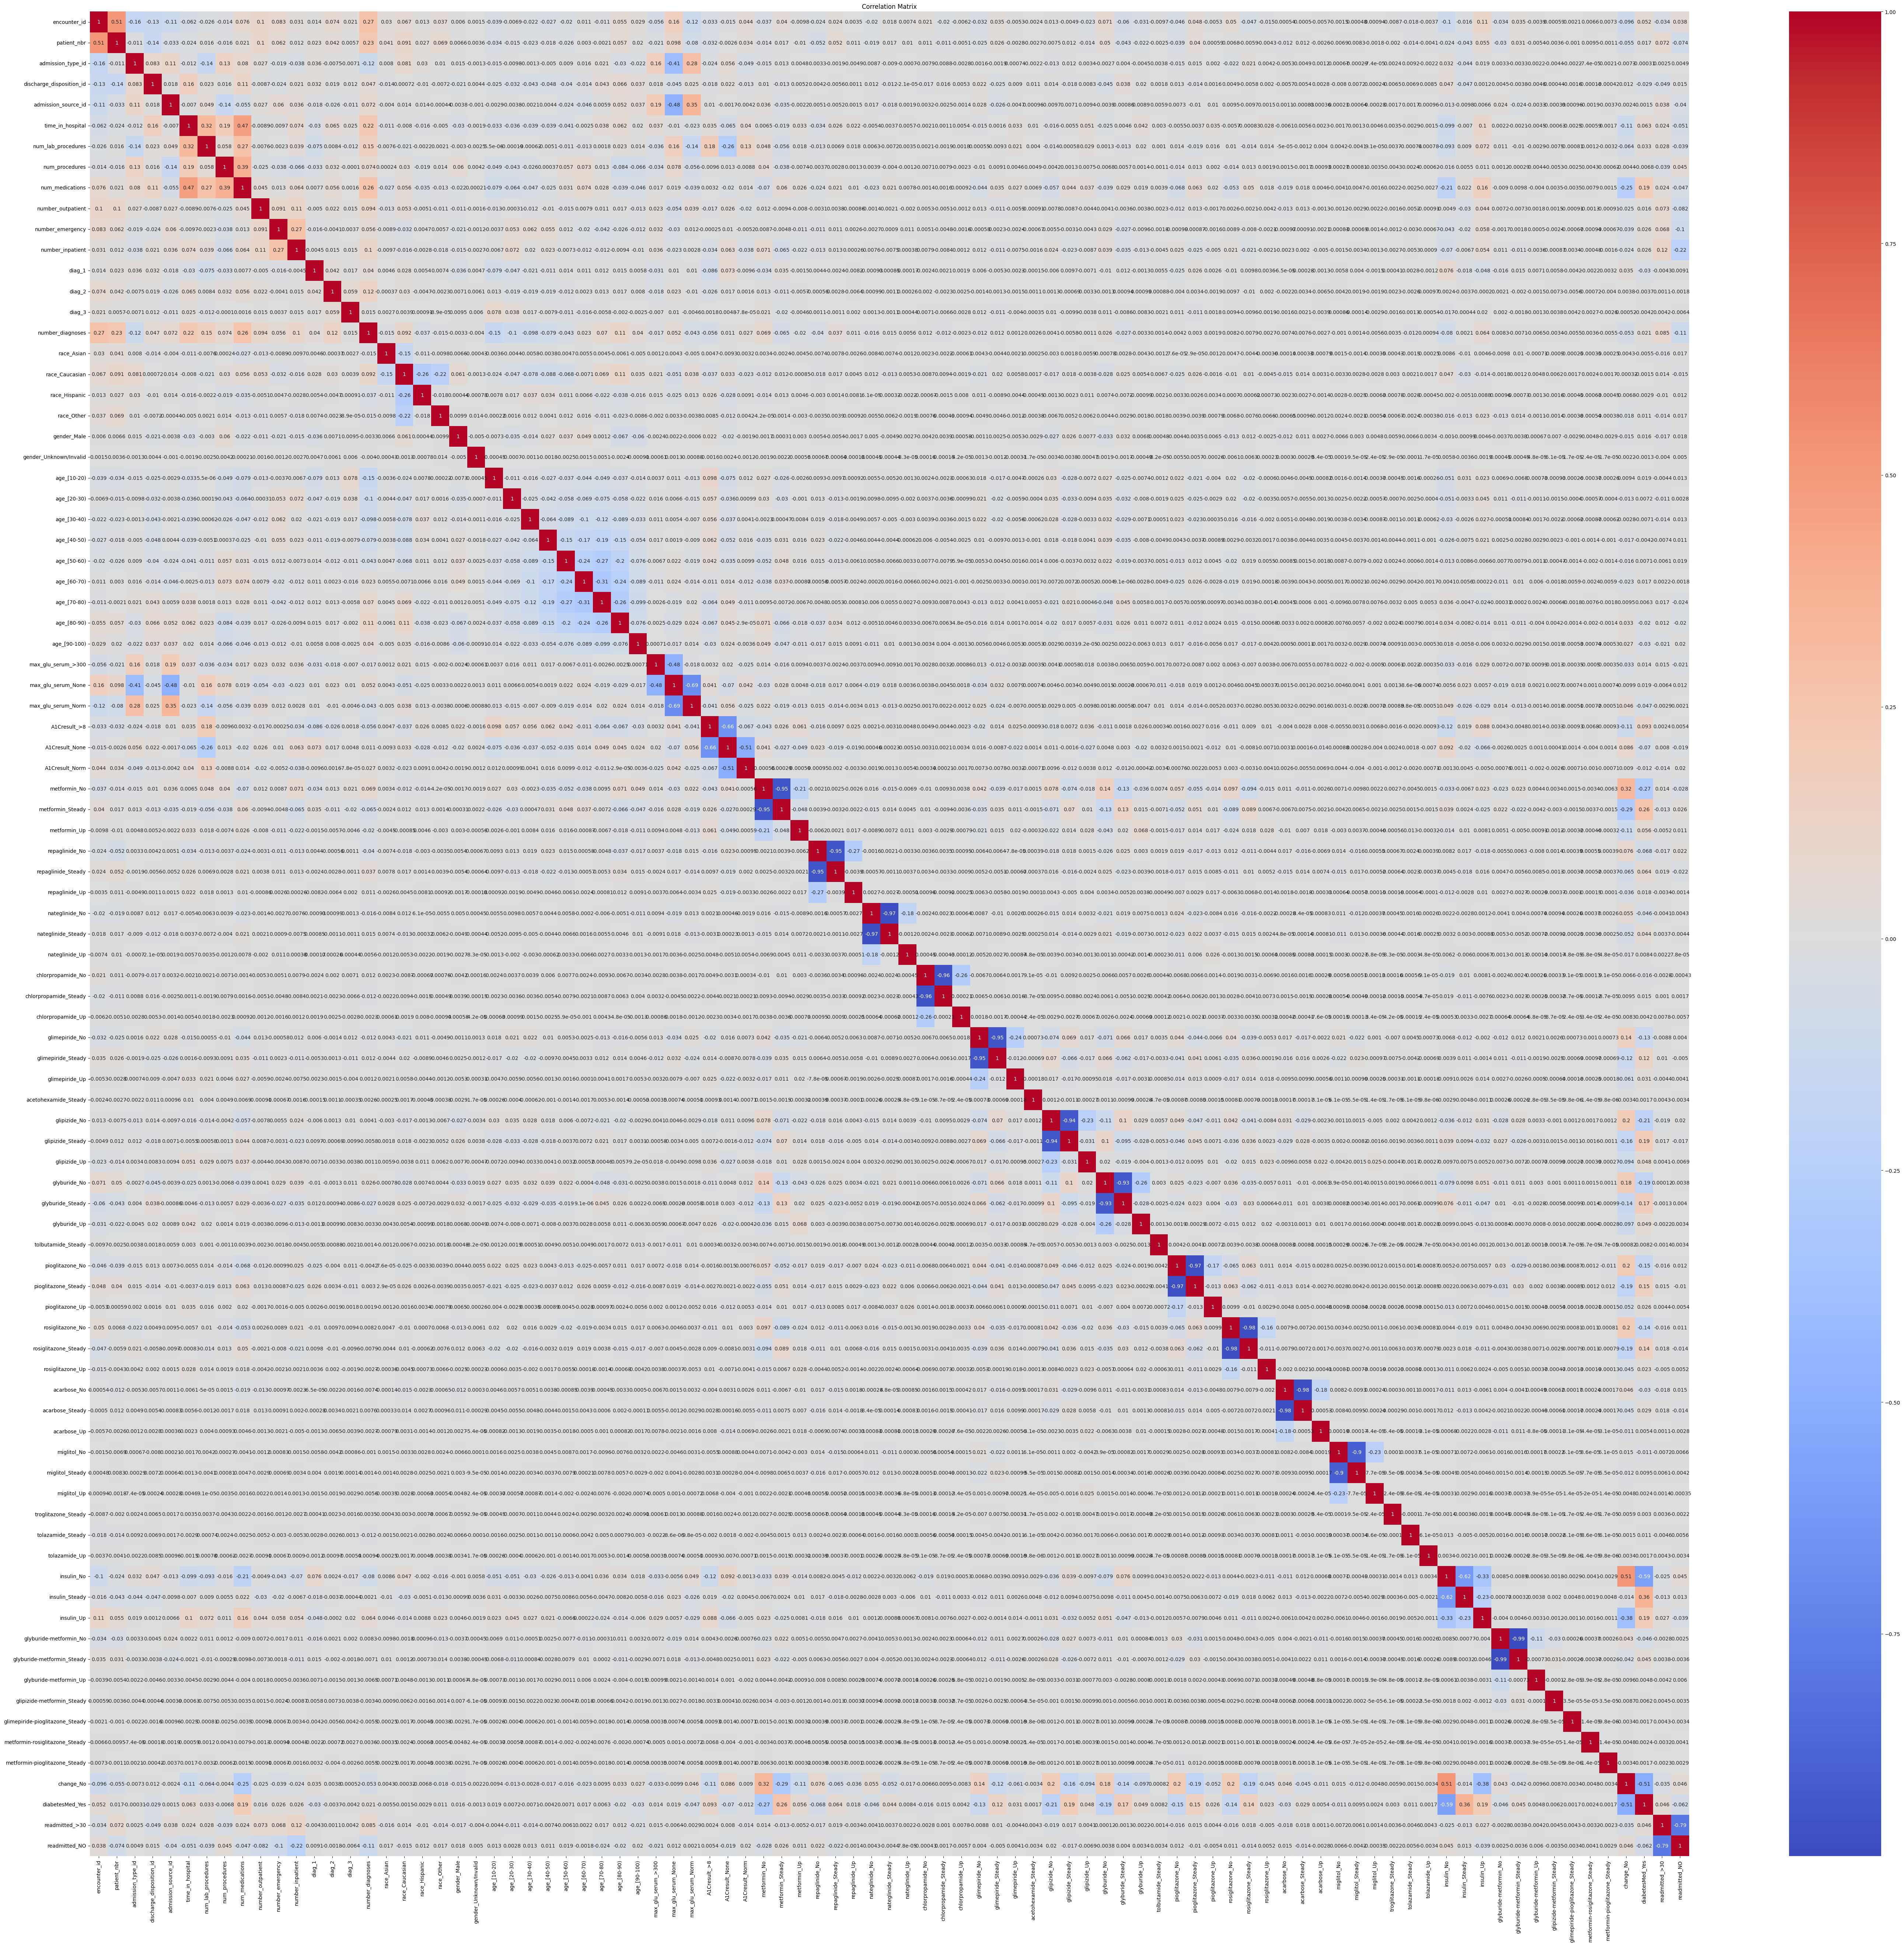

In [21]:
import seaborn as sns  #INCONCLUSIVE
import matplotlib.pyplot as plt

plt.figure(figsize=(70,65))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

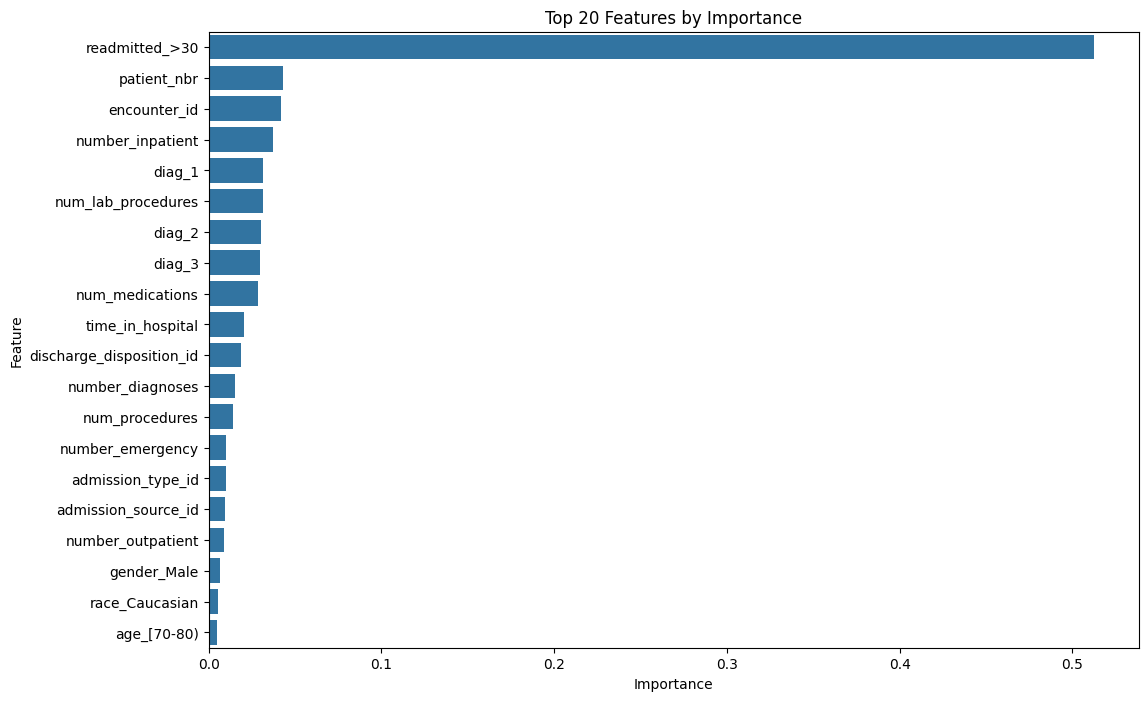

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Splitting the features and target variable
X=df_encoded.drop('readmitted_NO',axis=1)
y=df_encoded['readmitted_NO']

# Splitting into 80:20 ratio
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

# model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

# Extracting feature importance
feature_importances = rf_model.feature_importances_

#Creating DF for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by their importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#plot
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Features by Importance')
plt.show()


In [24]:
# Cross Validation
import numpy as np
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross Validation score", cv_scores)
print("Avergae Cross Validation Score", np.mean(cv_scores))

Cross Validation score [0.89424553 0.8945526  0.89436187 0.89110674 0.89577447]
Avergae Cross Validation Score 0.8940082447103179


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters from GridSearchCV: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.6717
Confusion Matrix:
 [[12100  1137]
 [ 5545  1572]]
Classification Report:
               precision    recall  f1-score   support

       False       0.69      0.91      0.78     13237
        True       0.58      0.22      0.32      7117

    accuracy                           0.67     20354
   macro avg       0.63      0.57      0.55     20354
weighted avg       0.65      0.67      0.62     20354



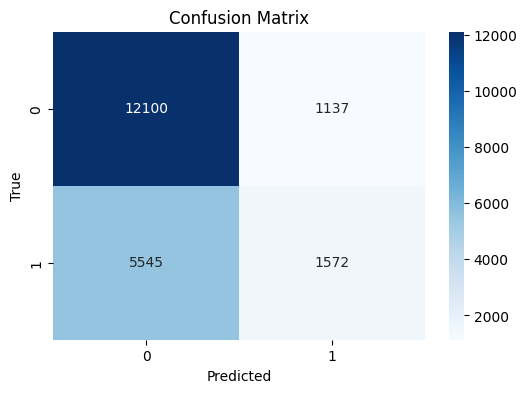

In [27]:
# Step 1: Define X (features) and y (target)
# Dropping both readmitted columns (>30 and NO), as we need to predict readmission
X = df_encoded.drop(['readmitted_>30', 'readmitted_NO'], axis=1)
y = df_encoded['readmitted_>30']  # We predict if patient was readmitted after 30 days

# Step 2: Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

# Step 4: Define the parameter grid to search over for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 5: Initialize GridSearchCV with the Random Forest model
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Step 6: Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Step 7: Get the best parameters
best_params = grid_search.best_params_
print("Best parameters from GridSearchCV:", best_params)

# Step 8: Train RandomForest with the best parameters
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

# Step 9: Evaluate the model on the test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rf_best.predict(X_test)

# Step 10: Performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# If you want to visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
#Train the model again with best parameters
best_rf_model = grid_search.best_estimator_

#Make predictions
y_pred =